In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

pd.set_option('display.float_format', '{:.5f}'.format)
%matplotlib inline

In [2]:
with open('random_data.txt') as f:
    data = f.readlines()

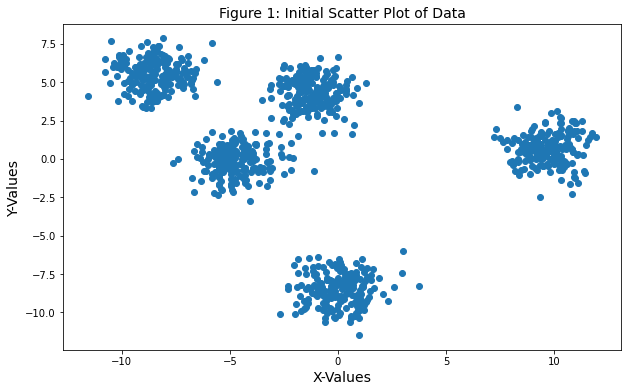

In [3]:
data_np = np.array([each.split() for each in data])
X = [float(each) for each in data_np[:,0]]
Y = [float(each) for each in data_np[:,1]]
data_km = np.column_stack((X, Y))

# Plot data to get an idea of how many clusters might we expect.
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.xlabel('X-Values', fontsize=14)
plt.ylabel('Y-Values', fontsize=14)
plt.title('Figure 1: Initial Scatter Plot of Data', fontsize=14)
plt.show()

In [4]:
def create_clusters_gmm(num_clusters=None, data=None):
    clf = GaussianMixture(n_components=num_clusters, random_state=42).fit(data)
    plt.figure(figsize=(10, 6))
    
    plt.scatter(data[:,0], data[:,1], c=clf.predict(data).astype(float))
    plt.scatter(x=list(clf.means_[:,0]), 
                y=list(clf.means_[:,1]), 
                c='r', s=50, marker='X')
    
    plt.xlabel('X-Values', fontsize=14)
    plt.ylabel('Y-Values', fontsize=14)
    string = 'Figure ' + str(2) + ': Scatter Plot with ' + str(num_clusters) + ' Cluster Centroids (GMM)'
    
    plt.title(string, fontsize=14)
    plt.show()

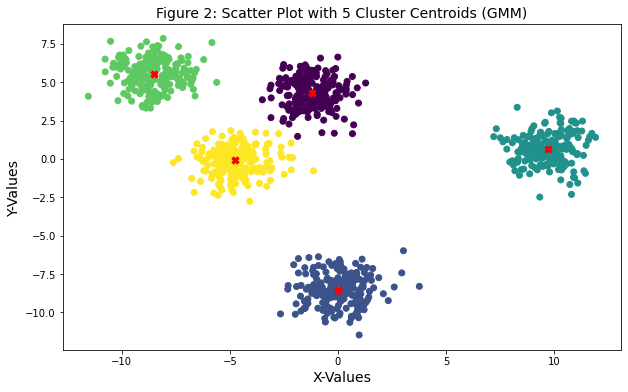

In [5]:
create_clusters_gmm(num_clusters=5, data=data_km)

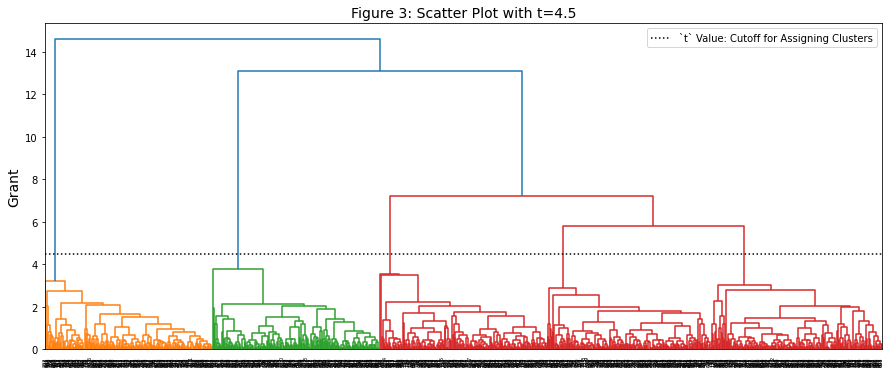

In [6]:
X = data_km[:,0]
y = data_km[:,1]
data = list(zip(X, y))

plt.figure(figsize=(15, 6))
plt.axhline(y=4.5, color='black', linestyle='dotted', label='`t` Value: Cutoff for Assigning Clusters')
clf = linkage(data, method='average', metric='euclidean')
string = 'Figure ' + str(3) + ': Scatter Plot with ' + 't=' + str(4.5)
plt.title(string, fontsize=14)
plt.legend()
plt.ylabel("Grant", fontsize=14)
dendrogram(clf)
plt.show()

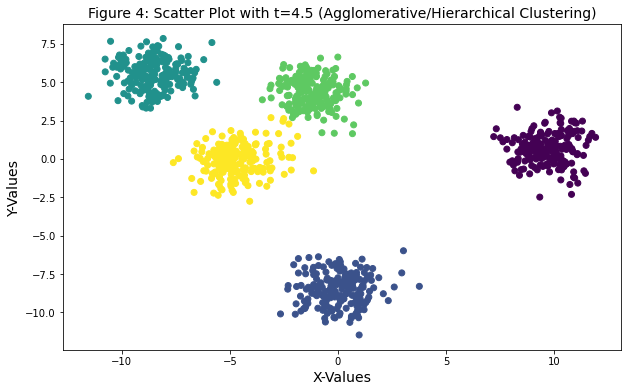

In [7]:
y_pred_class = fcluster(clf, t=4.5, criterion='distance')
string = 'Figure ' + str(4) + ': Scatter Plot with ' + 't=' + str(4.5) + " (Agglomerative/Hierarchical Clustering)"
plt.figure(figsize=(10, 6))
plt.title(string, fontsize=14)
plt.scatter(data_km[:,0], data_km[:,1], c=y_pred_class)
plt.xlabel('X-Values', fontsize=14)
plt.ylabel('Y-Values', fontsize=14)
plt.show()

In [8]:
def create_clusters_km(num_clusters=None):
    num_clusters = num_clusters
    km = KMeans(n_clusters = num_clusters, random_state=42).fit(data_km)
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(data_km[:,0], data_km[:,1], c=km.predict(data_km).astype(float))
    plt.scatter(x=list(km.cluster_centers_[:,0]), 
                y=list(km.cluster_centers_[:,1]), 
                c='r', s=50, marker='X')
    
    plt.xlabel('X-Values', fontsize=14)
    plt.ylabel('Y-Values', fontsize=14)
    string = 'Figure 5' + ': Scatter Plot with ' + str(num_clusters) + ' Cluster Centroids' + " (k-Means)"
    
    plt.title(string, fontsize=14)
    plt.show()

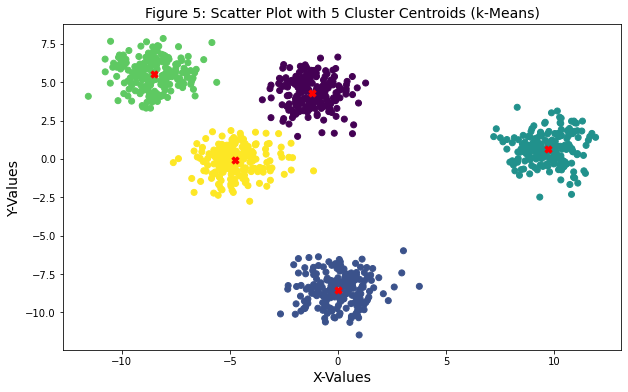

In [9]:
create_clusters_km(num_clusters=5)

In [10]:
km_ = KMeans(n_clusters=5, random_state=42).fit(data_km)
gmm_ = GaussianMixture(n_components=5, random_state=42).fit(data_km)
hc_ = linkage(data, method='average', metric='euclidean')

In [11]:
km_y_pred_class = km_.predict(data_km)
gmm_y_pred_class = gmm_.predict(data_km)
hc_y_pred_class = fcluster(hc_, t=4.5, criterion='distance')

In [12]:
silhouette_avg_km = silhouette_score(data_km, km_y_pred_class)
silhouette_avg_gmm = silhouette_score(data_km, gmm_y_pred_class)
silhouette_avg_hc = silhouette_score(data, hc_y_pred_class)

In [13]:
print('silhouette_avg_km: {:.4f} silhouette_avg_gmm: {:.4f} silhouette_avg_hc: {:.4f}'.format(silhouette_avg_km, 
                                                                                  silhouette_avg_gmm, 
                                                                                  silhouette_avg_hc))

silhouette_avg_km: 0.7567 silhouette_avg_gmm: 0.7567 silhouette_avg_hc: 0.7536
